In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import os
import PIL
import PIL.Image
import glob

import cv2

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


2022-09-08 14:31:02.778451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:02.796675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:02.796825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
x_train = []
y_train = []

path = "chest_xray/train/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_train.append(img)
    y_train.append(int(0))

path = "chest_xray/train/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_train.append(img)
    y_train.append(int(1))


x_val = []
y_val = []

path = "chest_xray/val/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(0))

path = "chest_xray/val/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(1))

In [4]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #normalize between 0 & 1
    img = img.astype("float32") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img


In [5]:
# Resize all the images to 480x480

endTrain = len(x_train)
endVal = len(x_val)

for image in range(0,endTrain):
    x_train[image] = tf.image.resize_with_pad(x_train[image],224,224)

for image in range(0,endVal):
    x_val[image] = tf.image.resize_with_pad(x_val[image],224,224)

2022-09-08 14:31:28.306991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:28.307214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:28.307350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:28.587904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 14:31:28.588045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

(5216, 224, 224, 3)
(16, 224, 224, 3)


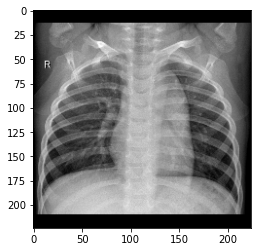

In [6]:
#  Convert to numpy array and check image

x_train = np.asarray(x_train, dtype=int)
y_train = np.asarray(y_train, dtype=int)
x_val = np.asarray(x_val, dtype=int)
y_val = np.asarray(y_val, dtype=int)

print(x_train.shape)
print(x_val.shape)
plt.imshow(x_train[0])

In [7]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

y_val= np.asarray(y_val).astype('float32').reshape((-1,1))

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(5216, 224, 224, 3)
(5216, 1)
(16, 224, 224, 3)
(16, 1)


In [9]:
# end = len(x_train)

# x_dataAug = []
# y_dataAug = []
# for image in range(0,end):
#     x_dataAug.append(multiply(x_train[image]))
#     y_dataAug.append(y_train[image])
#     x_dataAug.append(screen(x_train[image]))
#     y_dataAug.append(y_train[image])

In [10]:
# Save the processed x_train files

# end = len(x_train)
# path = 'chest_xray/processed'
# saveImages = np.asarray(x_train)
# # saveImages = saveImages * 255
# saveImages = saveImages.astype("int64")
# for image in range(0,end):
#     cv2.imwrite(os.path.join(path, str(image) + '.jpg'),saveImages[image])

In [11]:
# pretrained_base = tf.keras.applications.vgg19.VGG19(
#     include_top=False, weights='imagenet', input_tensor=None,
#     input_shape=[224,224,3], pooling=None, classes=None,
#     classifier_activation=None
# )

In [12]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[224, 244, 3]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [13]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [15]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    shuffle=True,
    batch_size=16,
    validation_data=(x_val,y_val),
    verbose=1,
)